In [1]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Access the features and labels
data = iris.data
labels = iris.target
target_names = iris.target_names

Ex 1


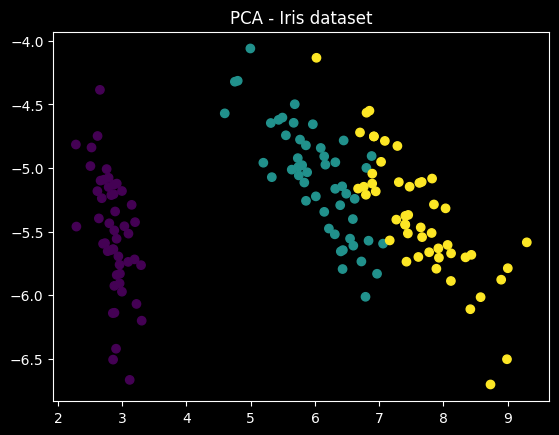

In [2]:
from MyPCA import MyPCA
from matplotlib import pyplot as plt

plt.style.use("dark_background")

pca = MyPCA(n_components=2)

projected_data = pca.fit_transform(data)

plt.scatter(projected_data[:, 0], projected_data[:, 1], c=labels)
plt.title("PCA - Iris dataset")
plt.show()

In [3]:
from scipy.cluster import hierarchy

Z_single = hierarchy.linkage(data, method="single")

Z_ward = hierarchy.linkage(data, method="ward")

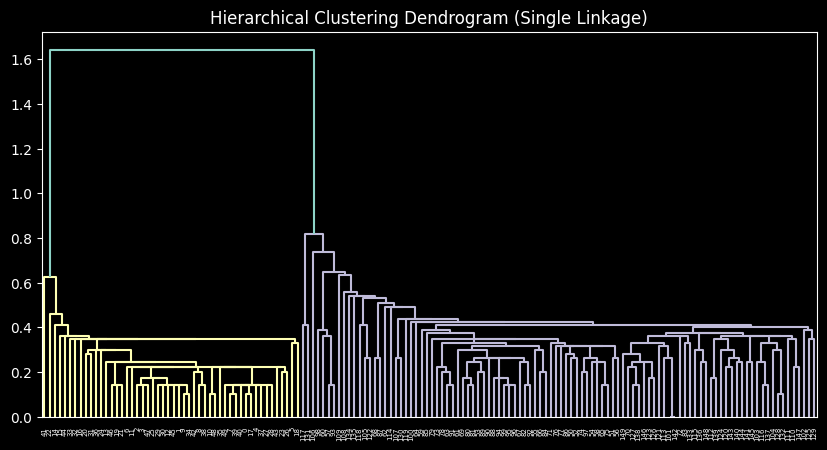

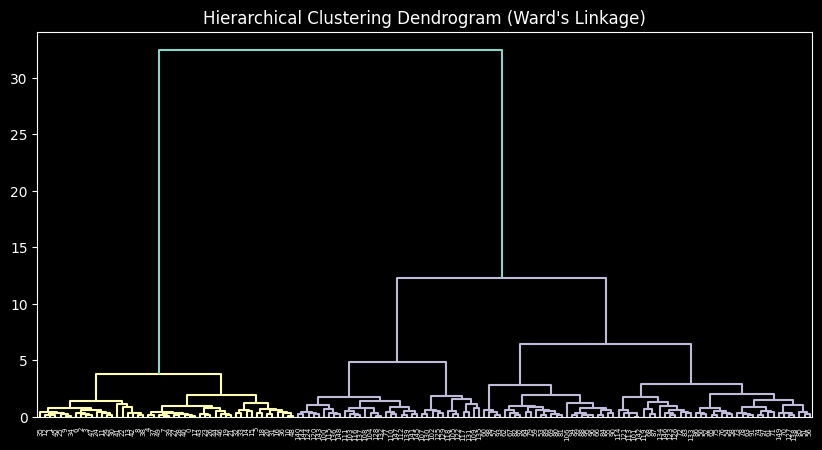

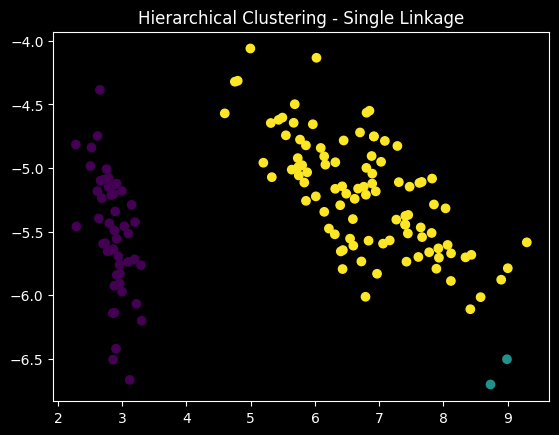

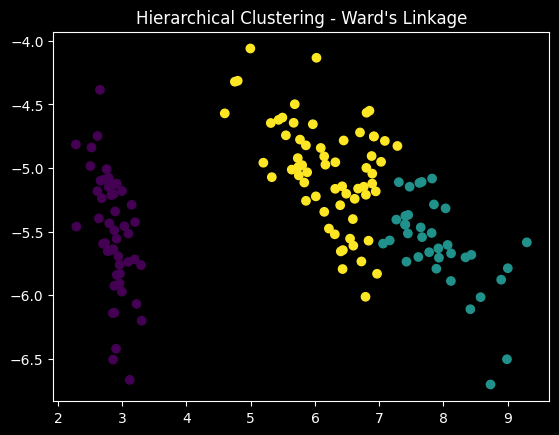

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np

# Plot the dendrogram for single linkage
plt.figure(figsize=(10, 5))
plt.title("Hierarchical Clustering Dendrogram (Single Linkage)")
dendrogram(Z_single)
plt.show()

# Plot the dendrogram for Ward's linkage
plt.figure(figsize=(10, 5))
plt.title("Hierarchical Clustering Dendrogram (Ward's Linkage)")
dendrogram(Z_ward)
plt.show()

# Cut the dendrogram to have the same number of clusters as the ground truth
k = len(np.unique(labels))
labels_single = fcluster(Z_single, k, criterion="maxclust")
labels_ward = fcluster(Z_ward, k, criterion="maxclust")

# Plot the data points in 2D, coloring by cluster
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=labels_single, cmap="viridis")
plt.title("Hierarchical Clustering - Single Linkage")
plt.show()

plt.scatter(projected_data[:, 0], projected_data[:, 1], c=labels_ward, cmap="viridis")
plt.title("Hierarchical Clustering - Ward's Linkage")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


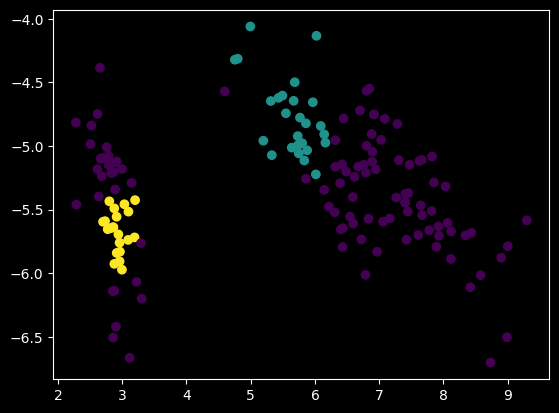

In [9]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from scipy.linalg import eig


def spectral_clustering(X, n_clusters, n_neighbors=5):
    # Construct the affinity matrix
    affinity_matrix = kneighbors_graph(
        X, n_neighbors=n_neighbors, mode="connectivity", include_self=True
    )
    affinity_matrix = 0.5 * (affinity_matrix + affinity_matrix.T)  # Make it symmetric

    # Compute the Laplacian matrix
    degree_matrix = np.diag(affinity_matrix.sum(axis=1))
    laplacian_matrix = degree_matrix - affinity_matrix

    # Compute the eigenvectors and eigenvalues of the Laplacian matrix
    _, eigenvectors = eig(laplacian_matrix)

    # Use K-means to cluster the eigenvectors
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(
        eigenvectors[:, 1 : n_clusters + 1]
    )  # Use the first k eigenvectors (excluding the first)

    return kmeans.labels_


# Perform spectral clustering
spectral_labels = spectral_clustering(data, n_clusters=3)

plt.scatter(projected_data[:, 0], projected_data[:, 1], c=spectral_labels)